In [6]:
from population import Population
from group_testing import HouseholdGroupTest, MatrixGroupTest
from static_simulation import StaticSimulation
from frequency import frequency

doubling_time = 3.0
alpha = 2 ** (1/doubling_time)
SAR = 0.374

#https://www.statista.com/statistics/242189/disitribution-of-households-in-the-us-by-household-size/
us_household_dist = [0.2837, 0.3451, 0.1507, 0.1276, 0.0578, 0.0226, 0.0125]

beta = 1
FNR = 0.3
FPR = 0.1
uspop = 328E6
tests_per_week_ub = 6E6

tests_per_week_per_person_ub = tests_per_week_ub / uspop


In [7]:
target_prevalence = 0.04

# initial_prevalence depends target_prevalence, SAR, and household-size dist 
# this value was computed elsewhere using monte-carlo estimation of E[target_prevalence]
initial_prevalence = 0.0221875

pop = Population(n_households=22500, # Should be big relative to the largest group size
                      household_size_dist=us_household_dist,
                      target_prevalence=target_prevalence,
                      disease_length=0,
                      time_until_symptomatic=0,
                      non_quarantine_alpha=alpha,
                      daily_secondary_attack_rate=SAR,
                      fatality_pct=0,
                      daily_outside_infection_pct=0,
                      outside_symptomatic_prob=0,
                      initial_quarantine=0,
                        initial_prevalence=initial_prevalence)

group_sizes = list(range(30,151,10))
nreps = 100

In [8]:

sim_outputs = {}
for group_size in group_sizes:
    group_test = HouseholdGroupTest(group_size, 1, FNR, FPR)
    QFNR, QFPR, tests_per_person, quarantines_per_person = StaticSimulation(pop,group_test).sim(nreps)
    days_between_tests = frequency(QFNR, pop.non_quarantine_alpha, beta)
    sim_outputs[group_size] = {'QFNR': QFNR,
                                'QFPR': QFPR,
                              'tests_per_person_per_week': tests_per_person / (days_between_tests / 7.0),
                              'quarantines_per_person': quarantines_per_person,
                              'days_between_tests': days_between_tests}
    print("For group size {}, computed tests/person/week {:.2f}, days between tests {:.2f}, quarantines/person {:.2f}".format(
        group_size, sim_outputs[group_size]['tests_per_person_per_week'], days_between_tests, quarantines_per_person))

sim_outputs_gollier = sim_outputs

For group size 30, computed tests/person/week 0.02, days between tests 11.65, quarantines/person 0.49
For group size 40, computed tests/person/week 0.01, days between tests 12.44, quarantines/person 0.57
For group size 50, computed tests/person/week 0.01, days between tests 13.28, quarantines/person 0.65
For group size 60, computed tests/person/week 0.01, days between tests 13.97, quarantines/person 0.70
For group size 70, computed tests/person/week 0.01, days between tests 14.89, quarantines/person 0.75
For group size 80, computed tests/person/week 0.01, days between tests 15.61, quarantines/person 0.79
For group size 90, computed tests/person/week 0.00, days between tests 16.30, quarantines/person 0.82
For group size 100, computed tests/person/week 0.00, days between tests 17.18, quarantines/person 0.86
For group size 110, computed tests/person/week 0.00, days between tests 18.10, quarantines/person 0.88
For group size 120, computed tests/person/week 0.00, days between tests 18.71, q

In [9]:
from group_testing import MatrixGroupTest

sim_outputs = {}
for group_size in group_sizes:
    group_test = MatrixGroupTest(group_size, FNR, FPR, fnr_at_swab_level=False)
    QFNR, QFPR, tests_per_person, quarantines_per_person = StaticSimulation(pop,group_test).sim(nreps)
    days_between_tests = frequency(QFNR, pop.non_quarantine_alpha, beta)
    sim_outputs[group_size] = {'QFNR': QFNR,
                                'QFPR': QFPR,
                              'tests_per_person_per_week': tests_per_person / (days_between_tests / 7.0),
                              'quarantines_per_person': quarantines_per_person,
                              'days_between_tests': days_between_tests}
    print("For group size {}, computed tests/person/week {:.2f}, days between tests {:.2f}, quarantines/person {:.2f}".format(
        group_size, sim_outputs[group_size]['tests_per_person_per_week'], days_between_tests, quarantines_per_person))
    
sim_outputs_matrix_swab_false = sim_outputs
    

For group size 30, computed tests/person/week 0.05, days between tests 9.09, quarantines/person 0.26
For group size 40, computed tests/person/week 0.03, days between tests 9.79, quarantines/person 0.35
For group size 50, computed tests/person/week 0.03, days between tests 10.49, quarantines/person 0.43
For group size 60, computed tests/person/week 0.02, days between tests 11.34, quarantines/person 0.51
For group size 70, computed tests/person/week 0.02, days between tests 11.98, quarantines/person 0.57
For group size 80, computed tests/person/week 0.01, days between tests 12.82, quarantines/person 0.63
For group size 90, computed tests/person/week 0.01, days between tests 13.47, quarantines/person 0.68
For group size 100, computed tests/person/week 0.01, days between tests 14.29, quarantines/person 0.73
For group size 110, computed tests/person/week 0.01, days between tests 14.93, quarantines/person 0.77
For group size 120, computed tests/person/week 0.01, days between tests 15.96, qua

In [10]:
from group_testing import MatrixGroupTest

sim_outputs = {}
for group_size in group_sizes:
    group_test = MatrixGroupTest(group_size, FNR, FPR, fnr_at_swab_level=True)
    QFNR, QFPR, tests_per_person, quarantines_per_person = StaticSimulation(pop,group_test).sim(nreps)
    days_between_tests = frequency(QFNR, pop.non_quarantine_alpha, beta)
    sim_outputs[group_size] = {'QFNR': QFNR,
                                'QFPR': QFPR,
                              'tests_per_person_per_week': tests_per_person / (days_between_tests / 7.0),
                              'quarantines_per_person': quarantines_per_person,
                              'days_between_tests': days_between_tests}
    print("For group size {}, computed tests/person/week {:.2f}, days between tests {:.2f}, quarantines/person {:.2f}".format(
        group_size, sim_outputs[group_size]['tests_per_person_per_week'], days_between_tests, quarantines_per_person))

    
sim_outputs_matrix_swab_true = sim_outputs    

For group size 30, computed tests/person/week 0.04, days between tests 10.61, quarantines/person 0.28
For group size 40, computed tests/person/week 0.03, days between tests 10.99, quarantines/person 0.35
For group size 50, computed tests/person/week 0.02, days between tests 11.69, quarantines/person 0.44
For group size 60, computed tests/person/week 0.02, days between tests 12.19, quarantines/person 0.52
For group size 70, computed tests/person/week 0.02, days between tests 12.89, quarantines/person 0.58
For group size 80, computed tests/person/week 0.01, days between tests 13.63, quarantines/person 0.64
For group size 90, computed tests/person/week 0.01, days between tests 14.26, quarantines/person 0.70
For group size 100, computed tests/person/week 0.01, days between tests 14.77, quarantines/person 0.73
For group size 110, computed tests/person/week 0.01, days between tests 15.78, quarantines/person 0.78
For group size 120, computed tests/person/week 0.01, days between tests 16.44, q

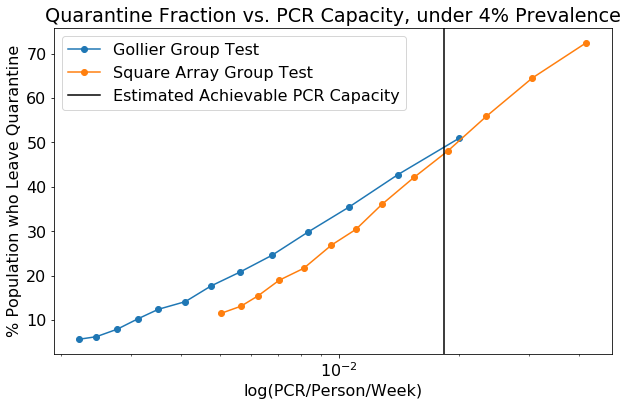

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams.update({'font.size': 16})

plt.figure(figsize=(10,6))

def add_plot(sim, label):
    plt.plot([sim[group_size]['tests_per_person_per_week'] for group_size in group_sizes],
             [100 * (1 - sim[group_size]['quarantines_per_person']) for group_size in group_sizes],
             label=label, marker='o')

add_plot(sim_outputs_gollier, "Gollier Group Test")
#add_plot(sim_outputs_matrix_swab_false, "Matrix Group Test, Test-level Errors")
add_plot(sim_outputs_matrix_swab_true, "Square Array Group Test")

plt.axvline(tests_per_week_per_person_ub, label="Estimated Achievable PCR Capacity", color='black')


plt.xlabel("log(PCR/Person/Week)")
plt.xscale('log')

plt.ylabel("% Population who Leave Quarantine")

plt.legend(loc='best')

plt.title("Quarantine Fraction vs. PCR Capacity, under 4% Prevalence")
plt.show()

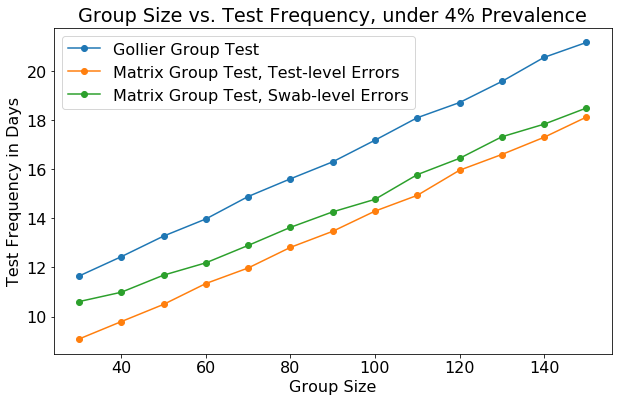

In [19]:
plt.figure(figsize=(10,6))

def add_plot(sim, label):
    plt.plot(group_sizes,
             [sim[group_size]['days_between_tests'] for group_size in group_sizes],
             label=label, marker='o')

add_plot(sim_outputs_gollier, "Gollier Group Test")
add_plot(sim_outputs_matrix_swab_false, "Matrix Group Test, Test-level Errors")
add_plot(sim_outputs_matrix_swab_true, "Matrix Group Test, Swab-level Errors")


plt.xlabel("Group Size")

plt.ylabel("Test Frequency in Days")

plt.legend(loc='best')

plt.title("Group Size vs. Test Frequency, under 4% Prevalence")
plt.show()

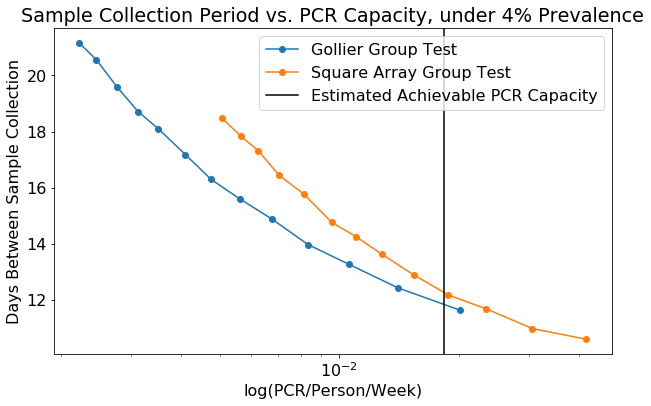

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams.update({'font.size': 16})

plt.figure(figsize=(10,6))

def add_plot(sim, label):
    plt.plot([sim[group_size]['tests_per_person_per_week'] for group_size in group_sizes],
             [sim[group_size]['days_between_tests'] for group_size in group_sizes],
             label=label, marker='o')

add_plot(sim_outputs_gollier, "Gollier Group Test")
#add_plot(sim_outputs_matrix_swab_false, "Matrix Group Test, Test-level Errors")
add_plot(sim_outputs_matrix_swab_true, "Square Array Group Test")

plt.axvline(tests_per_week_per_person_ub, label="Estimated Achievable PCR Capacity", color='black')

plt.xlabel("log(PCR/Person/Week)")
plt.xscale('log')

plt.ylabel("Days Between Sample Collection")

plt.legend(loc='best')

plt.title("Sample Collection Period vs. PCR Capacity, under 4% Prevalence")
plt.show()

In [30]:
from group_testing import MatrixGroupTest

def recompute_with_beta(sim_outputs, beta):
    for group_size in group_sizes:
        QFNR = sim_outputs[group_size]['QFNR']
        orig_days = sim_outputs[group_size]['days_between_tests']
        orig_tests_per_person = sim_outputs[group_size]['tests_per_person_per_week']
        tests_per_person = orig_tests_per_person * (orig_days / 7.0)
        days_between_tests = frequency(QFNR, pop.non_quarantine_alpha, beta)
        sim_outputs[group_size]['days_between_tests_beta_{:.4f}'.format(beta)] = days_between_tests
        sim_outputs[group_size]['tests_per_person_per_week_beta_{:.4f}'.format(beta)] = \
            tests_per_person / (days_between_tests / 7.0)
        
    
beta = 0.5 ** (1/7.0)

recompute_with_beta(sim_outputs_gollier, beta)
recompute_with_beta(sim_outputs_matrix_swab_true, beta)

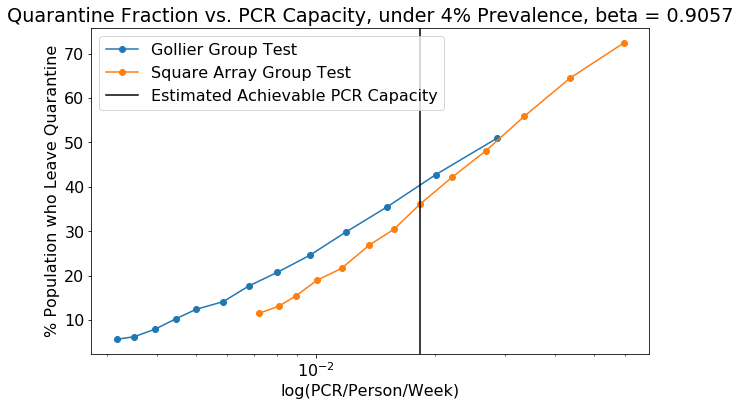

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams.update({'font.size': 16})

plt.figure(figsize=(10,6))

def add_plot(sim, label, beta):
    plt.plot([sim[group_size]['tests_per_person_per_week_beta_{:.4f}'.format(beta)] for group_size in group_sizes],
             [100 * (1 - sim[group_size]['quarantines_per_person']) for group_size in group_sizes],
             label=label, marker='o')

add_plot(sim_outputs_gollier, "Gollier Group Test", beta)
#add_plot(sim_outputs_matrix_swab_false, "Matrix Group Test, Test-level Errors")
add_plot(sim_outputs_matrix_swab_true, "Square Array Group Test", beta)

plt.axvline(tests_per_week_per_person_ub, label="Estimated Achievable PCR Capacity", color='black')


plt.xlabel("log(PCR/Person/Week)")
plt.xscale('log')

plt.ylabel("% Population who Leave Quarantine")

plt.legend(loc='best')

plt.title("Quarantine Fraction vs. PCR Capacity, under 4% Prevalence, beta = {:.4f}".format(beta))
plt.show()

# old

In [4]:
from group_testing import MatrixGroupTest

group_sizes = list(range(40,131,10))
nreps = 100
sim_outputs = {}
for group_size in group_sizes:
    group_test = MatrixGroupTest(group_size, FNR, FPR, fnr_at_swab_level=True)
    QFNR, QFPR, tests_per_person, quarantines_per_person = StaticSimulation(pop,group_test).sim(nreps)
    days_between_tests = frequency(QFNR, pop.non_quarantine_alpha, beta)
    sim_outputs[group_size] = {'QFNR': QFNR,
                                'QFPR': QFPR,
                              'tests_per_person_per_week': tests_per_person / (days_between_tests / 7.0),
                              'quarantines_per_person': quarantines_per_person,
                              'days_between_tests': days_between_tests}
    print("For group size {}, computed {}".format(group_size, sim_outputs[group_size]))

For group size 40, computed {'QFNR': 0.07765843524106138, 'QFPR': 0.3381306461095253, 'tests_per_person_per_week': 0.031021591270636653, 'quarantines_per_person': 0.36168032786885246, 'days_between_tests': 11.060140654359556}
For group size 50, computed {'QFNR': 0.06752215156747651, 'QFPR': 0.4118969775007949, 'tests_per_person_per_week': 0.0234637407825756, 'quarantines_per_person': 0.43243452405197347, 'days_between_tests': 11.66548594221821}
For group size 60, computed {'QFNR': 0.05908092565375087, 'QFPR': 0.49870947391189285, 'tests_per_person_per_week': 0.018738411130129258, 'quarantines_per_person': 0.5165225941251178, 'days_between_tests': 12.24349127996591}
For group size 70, computed {'QFNR': 0.05100533894918412, 'QFPR': 0.5671462703563793, 'tests_per_person_per_week': 0.01543761014437128, 'quarantines_per_person': 0.5824784015067764, 'days_between_tests': 12.879623764991084}
For group size 80, computed {'QFNR': 0.044479075666074876, 'QFPR': 0.6215839543300565, 'tests_per_pers

In [4]:
pop.get_avg_household_size()

2.4333